# Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Tensurf/DeepLOB')
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from keras.utils import np_utils
from keras.layers import Dense, Input, LSTM, Reshape, Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import shutil
import ntpath
import re
import csv
import json
from datetime import datetime as dt
import requests
import pytz
from datetime import timedelta

In [3]:
!unzip '/content/drive/MyDrive/DeepLOB improved/Data/1-09-1-20.zip'

Archive:  /content/drive/MyDrive/DeepLOB improved/Data/1-09-1-20.zip
  inflating: 1-09-1-20.csv           


# Data Loading and Visualization

In [4]:
df = pd.read_csv('/content/1-09-1-20.csv',index_col='Unnamed: 0',parse_dates=True)
df.columns = np.arange(42)
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1673302660926,2023-01-09 22:17:40,17181.6,23.371,17181.5,0.746,17181.4,5.428,17181.2,0.890,...,17182.2,5.168,17182.3,0.020,17182.4,6.692,17182.5,1.904,17182.6,2.546
1,1673302661177,2023-01-09 22:17:41,17181.6,24.232,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.001,17182.5,1.869,17182.6,2.105
2,1673302661427,2023-01-09 22:17:41,17181.6,24.403,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.012,17182.5,1.869,17182.6,2.713
3,1673302661678,2023-01-09 22:17:41,17181.6,24.874,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.001,17182.5,2.570,17182.6,2.613
4,1673302661928,2023-01-09 22:17:41,17181.6,24.403,17181.5,0.694,17181.4,5.428,17181.2,0.890,...,17182.2,6.043,17182.3,0.020,17182.4,6.001,17182.5,2.589,17182.6,2.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730865,1674238247671,2023-01-20 18:10:47,21337.6,0.167,21337.5,0.100,21337.4,0.014,21336.9,0.025,...,21338.2,0.022,21338.3,0.028,21338.4,0.235,21338.5,1.657,21338.6,0.234
3730866,1674238247921,2023-01-20 18:10:47,21337.5,0.108,21337.4,0.014,21336.9,0.257,21336.8,0.063,...,21338.2,0.022,21338.3,0.036,21338.4,0.236,21338.5,1.657,21338.6,0.235
3730867,1674238248172,2023-01-20 18:10:48,21337.4,0.891,21337.2,0.552,21337.1,1.095,21336.9,0.025,...,21338.1,0.002,21338.2,0.048,21338.3,0.036,21338.4,0.001,21338.5,1.658
3730868,1674238248422,2023-01-20 18:10:48,21337.4,2.456,21337.3,1.149,21337.2,0.002,21336.9,0.025,...,21338.1,0.002,21338.2,0.048,21338.3,0.036,21338.4,0.001,21338.5,1.658


In [5]:
df = df.drop_duplicates(subset=1)
# df.loc[:,0] = df[0].apply(lambda x:dt.fromtimestamp(x/1000,tz=pytz.UTC))
data = df.loc[:,[2,3,22,23,4,5,24,25,6,7,26,27,8,9,28,29,10,11,30,31,12,13,32,33,14,15,34,35,16,17,36,37,18,19,38,39,20,21,40,41]]
# data.set_index(keys=pd.to_datetime(df[0]),drop=True,inplace=True)
data.set_index(keys=pd.to_datetime(df[1]),drop=True,inplace=True)

In [6]:
data

,2,3,22,23,4,5,24,25,6,7,...,36,37,18,19,38,39,20,21,40,41
1,,,,,,,,,,,,,,,,,,,,,
2023-01-09 22:17:40,17181.6,23.371,17181.7,7.474,17181.5,0.746,17181.8,3.442,17181.4,5.428,...,17182.4,6.692,17180.7,0.876,17182.5,1.904,17180.6,2.854,17182.6,2.546
2023-01-09 22:17:41,17181.6,24.232,17181.7,7.088,17181.5,0.694,17181.8,2.554,17181.4,5.428,...,17182.4,6.001,17180.7,0.876,17182.5,1.869,17180.6,2.854,17182.6,2.105
2023-01-09 22:17:42,17181.6,24.403,17181.7,7.272,17181.5,0.686,17181.8,2.480,17181.4,5.428,...,17182.4,6.001,17180.7,0.876,17182.5,3.785,17180.6,2.854,17182.6,1.404
2023-01-09 22:17:43,17181.6,24.376,17181.7,5.548,17181.5,0.689,17181.8,2.480,17181.4,5.429,...,17182.4,6.001,17180.7,0.876,17182.5,2.572,17180.6,2.854,17182.6,1.442
2023-01-09 22:17:44,17181.6,24.376,17181.7,5.426,17181.5,0.715,17181.8,2.480,17181.4,5.429,...,17182.4,6.692,17180.7,0.876,17182.5,1.876,17180.6,2.854,17182.6,1.442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20 18:10:44,21335.9,45.952,21336.0,1.655,21335.8,0.699,21336.2,0.898,21335.7,9.002,...,21337.1,1.128,21335.0,0.165,21337.2,1.007,21334.9,0.763,21337.3,0.868
2023-01-20 18:10:45,21335.9,27.256,21336.0,14.002,21335.8,0.699,21336.1,0.558,21335.7,1.404,...,21336.8,0.014,21334.9,0.205,21337.1,0.001,21334.8,0.284,21337.2,0.413
2023-01-20 18:10:46,21335.9,16.003,21336.0,2.114,21335.8,1.842,21336.1,0.009,21335.7,0.247,...,21336.9,1.139,21334.9,0.096,21337.0,0.065,21334.8,0.298,21337.1,0.234


In [7]:
#CALCULATE MIDPRICE
midprice = pd.DataFrame((df.iloc[:,2] + df.iloc[:,22] )/2,columns=['Price'] )
midprice['Time'] = pd.to_datetime(df[1])
midprice.set_index(keys='Time',inplace=True)

In [8]:
midprice

,Price
Time,
2023-01-09 22:17:40,17181.65
2023-01-09 22:17:41,17181.65
2023-01-09 22:17:42,17181.65
2023-01-09 22:17:43,17181.65
2023-01-09 22:17:44,17181.65
...,...
2023-01-20 18:10:44,21335.95
2023-01-20 18:10:45,21335.95
2023-01-20 18:10:46,21335.95


In [9]:
#CALCULATE LABELS BASED ON THE DEEPLOB PAPER METHOD
def labeling(data,k,alpha,type=1):
  data["MeanNegativeMid"] = data['Price'].rolling(window=k).mean()
  data["MeanPositiveMid"] = data["MeanNegativeMid"].shift(-(k-1))
  if type == 1:
      data["SmoothingLabel"] = (data["MeanPositiveMid"] - data['Price']) / data['Price']
  elif type == 2:
      data["SmoothingLabel"] = (data["MeanPositiveMid"] - data["MeanNegativeMid"]) / data["MeanNegativeMid"]
  labels_np = data["SmoothingLabel"].dropna()
  data[k] = None
  data.loc[labels_np.index, k] = 0
  data.loc[data["SmoothingLabel"] < -alpha, k] = -1
  data.loc[data["SmoothingLabel"] > alpha, k] = 1
  return data

In [10]:
label = labeling(midprice,k=10,alpha=0.00001)
#REMOVE THE NULL ROWS
label.dropna(inplace=True)
data= data.loc[label.index]

In [11]:
#SLIDING WINDOW NORMALIZATION
window_size=86400
col_mean = data.rolling(window_size).mean()
col_std = data.rolling(window_size).std()

data = (data - col_mean)/col_std
data.dropna(inplace=True)

In [12]:
#ONE HOT ENCODING THE LABELS
label = label.loc[data.index,10]
label = tf.keras.utils.to_categorical(label,num_classes=3)

In [14]:
#CREATE DATALODER
class DataSegmentation(tf.keras.utils.Sequence):
    def __init__(self, X, Y,number_features,window_size,batch_size):
        self.X, self.Y = X.reset_index(drop=True), Y
        self.window_size = window_size
        self.batch_size = batch_size
        self.number_features = number_features

    def __len__(self):
        return math.floor((len(self.X)-self.window_size)/ self.batch_size)
    def __getitem__(self, idx):
      dataX =[]
      dataY=[]
      idx+=self.window_size
      for i in range(self.batch_size):
        x_sample=self.X.loc[idx-self.window_size:idx-1]
        y_sample=self.Y[idx]
        dataX.append(x_sample)
        dataY.append(y_sample)
        idx+=1
      dataX = np.array(dataX).reshape(-1,self.window_size,self.number_features)
      dataY = np.array(dataY)
      return dataX,dataY

In [15]:
#SPLITING THE DATA INTO TRAIN, VALIDATION AND TEST
batch_size= 20
window_size= 300
number_features = 40
Train_size = math.floor(len(data)*0.6)
Validation_size = math.floor(len(data)*0.15)
TrainBatch = DataSegmentation(data.iloc[:Train_size],label[:Train_size],number_features,window_size,batch_size)
ValidationBatch = DataSegmentation(data.iloc[Train_size:Train_size+Validation_size],label[Train_size:Train_size+Validation_size],number_features,window_size,batch_size)
TestBatch = DataSegmentation(data.iloc[Train_size+Validation_size:],label[Train_size+Validation_size:],number_features,window_size,batch_size)

# Training DeepLOB


In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

# %%
import os
import logging
import glob
import argparse
import sys
import time
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set random seeds
np.random.seed(1)
tf.random.set_seed(2)

In [16]:
#DEEP LOB ORIGINAL MODEL
def create_deeplob(T, NF, number_of_lstm):
    input_lmd = Input(shape=(T, NF, 1))
    # build the convolutional block
    conv_first1 = Conv2D(32, (1, 2), strides=(1, 2))(input_lmd)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (1, 2), strides=(1, 2))(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (1, 10))(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    # build the inception module
    convsecond_1 = Conv2D(64, (1, 1), padding='same')(conv_first1)
    convsecond_1 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_1)
    convsecond_1 = Conv2D(64, (3, 1), padding='same')(convsecond_1)
    convsecond_1 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_1)
    convsecond_2 = Conv2D(64, (1, 1), padding='same')(conv_first1)
    convsecond_2 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_2)
    convsecond_2 = Conv2D(64, (5, 1), padding='same')(convsecond_2)
    convsecond_2 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_2)
    convsecond_3 = MaxPooling2D((3, 1), strides=(1, 1), padding='same')(conv_first1)
    convsecond_3 = Conv2D(64, (1, 1), padding='same')(convsecond_3)
    convsecond_3 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_3)
    convsecond_output = keras.layers.concatenate([convsecond_1, convsecond_2, convsecond_3], axis=3)
    conv_reshape = Reshape((int(convsecond_output.shape[1]), int(convsecond_output.shape[3])))(convsecond_output)
    conv_reshape = keras.layers.Dropout(0.2, noise_shape=(None, 1, int(conv_reshape.shape[2])))(conv_reshape, training=True)
    # build the last LSTM layer
    conv_lstm = LSTM(number_of_lstm)(conv_reshape)
    # build the output layer
    out = Dense(3, activation='softmax')(conv_lstm)
    model = Model(inputs=input_lmd, outputs=out)
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [17]:
model = create_deeplob(300,40,64)

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/DeepLOB improved/Weights/DEEPLOB/Weights'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

In [ ]:
history = model.fit(TrainBatch
          ,validation_data=ValidationBatch,
          epochs=10, verbose=1,use_multiprocessing=True,workers=5,callbacks=[model_checkpoint_callback])

Epoch 1/10
25448/25448 [==============================] - 811s 31ms/step - loss: 0.7819 - accuracy: 0.6517 - val_loss: 1.2963 - val_accuracy: 0.3856
Epoch 2/10
25448/25448 [==============================] - 817s 32ms/step - loss: 0.5997 - accuracy: 0.7351 - val_loss: 1.7438 - val_accuracy: 0.3838
Epoch 3/10
25448/25448 [==============================] - 807s 32ms/step - loss: 0.3936 - accuracy: 0.8373 - val_loss: 2.1607 - val_accuracy: 0.3740
Epoch 4/10
25448/25448 [==============================] - 851s 33ms/step - loss: 0.2586 - accuracy: 0.8991 - val_loss: 2.8610 - val_accuracy: 0.3614
Epoch 5/10
25448/25448 [==============================] - 805s 32ms/step - loss: 0.1786 - accuracy: 0.9325 - val_loss: 3.4230 - val_accuracy: 0.3575
Epoch 6/10
25448/25448 [==============================] - 799s 31ms/step - loss: 0.1284 - accuracy: 0.9522 - val_loss: 3.7869 - val_accuracy: 0.3462
Epoch 7/10
25448/25448 [==============================] - 800s 31ms/step - loss: 0.0968 - accuracy: 0.9643

# Results

In [29]:
checkpoint_filepath = '/content/drive/MyDrive/DeepLOB improved/Weights/DEEPLOB/Weights'

In [47]:
model.load_weights(checkpoint_filepath)
pred = model.predict(TestBatch,use_multiprocessing=True,workers=5)

10594/10594 [==============================] - 2312s 218ms/step


In [31]:
loss = model.evaluate(TestBatch,steps=100)

100/100 [==============================] - 21s 200ms/step - loss: 1.1071 - accuracy: 0.5505


In [32]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,f1_score,precision_score,classification_report
import seaborn as sn
def plot_results(y_true,y_pred):
    conf_matrix=confusion_matrix(y_true,y_pred)
    # conf_matrix = conf_matrix / conf_matrix.astype('float').sum(axis=0)
    plt.figure(figsize=(10,8))
    sn.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cmap='RdYlGn',fmt='g') # font size
    plt.title("Confusion Matrix")
    plt.show()
    print(classification_report(y_true, y_pred, digits=4))

In [ ]:
y_test = []
for i in range(len(TestBatch)):
  y_test.append(TestBatch[i][1])
y_test = np.array(y_test).reshape(-1,3)
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(pred,axis=1)

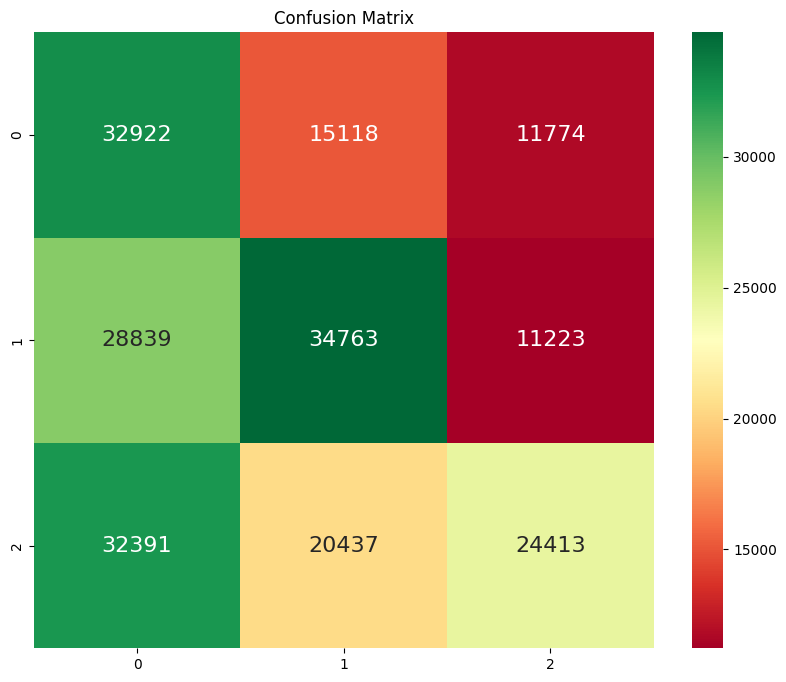

              precision    recall  f1-score   support

           0     0.3497    0.5504    0.4277     59814
           1     0.4944    0.4646    0.4790     74825
           2     0.5149    0.3161    0.3917     77241

    accuracy                         0.4347    211880
   macro avg     0.4530    0.4437    0.4328    211880
weighted avg     0.4610    0.4347    0.4327    211880



In [77]:
plot_results(y_test,y_pred)

# Temporal CNN

In [78]:
!pip install -q keras-tcn --no-dependencies
from tcn import TCN, tcn_full_summary

In [79]:
model = keras.models.Sequential([
      TCN(input_shape=(300,40), nb_filters=256, dilations=[1, 2, 4, 8, 16, 32]),
      Dense(
          3,activation='softmax')
  ])

In [80]:
adam = Adam(learning_rate=0.00001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
checkpoint_filepath = '/content/drive/MyDrive/DeepLOB improved/Weights/TCN/weights'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

In [28]:
history = model.fit(TrainBatch
          ,validation_data=ValidationBatch,
          epochs=10, verbose=1,use_multiprocessing=True,workers=5,callbacks=[model_checkpoint_callback])

Epoch 1/10
25447/25447 [==============================] - 1230s 48ms/step - loss: 0.8543 - accuracy: 0.7158 - val_loss: 2.1775 - val_accuracy: 0.3220
Epoch 2/10
25447/25447 [==============================] - 1218s 48ms/step - loss: 0.1518 - accuracy: 0.9548 - val_loss: 3.1210 - val_accuracy: 0.3146
Epoch 3/10
25447/25447 [==============================] - 1213s 48ms/step - loss: 0.0324 - accuracy: 0.9945 - val_loss: 3.8734 - val_accuracy: 0.3145
Epoch 4/10
25447/25447 [==============================] - 1209s 47ms/step - loss: 0.0186 - accuracy: 0.9964 - val_loss: 4.1853 - val_accuracy: 0.3227
Epoch 5/10
25447/25447 [==============================] - 1213s 48ms/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 4.7595 - val_accuracy: 0.3108
Epoch 6/10
25447/25447 [==============================] - 1216s 48ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 5.2885 - val_accuracy: 0.3105
Epoch 7/10
25447/25447 [==============================] - 1239s 49ms/step - loss: 0.0103 - accuracy:

# Results

In [81]:
checkpoint_filepath = '/content/drive/MyDrive/DeepLOB improved/Weights/TCN/weights'
model.load_weights(checkpoint_filepath)
pred = model.predict(TestBatch,use_multiprocessing=True,workers=5)

10594/10594 [==============================] - 5761s 543ms/step


In [82]:
y_test = []
for i in range(len(TestBatch)):
  y_test.append(TestBatch[i][1])
y_test = np.array(y_test).reshape(-1,3)
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(pred,axis=1)

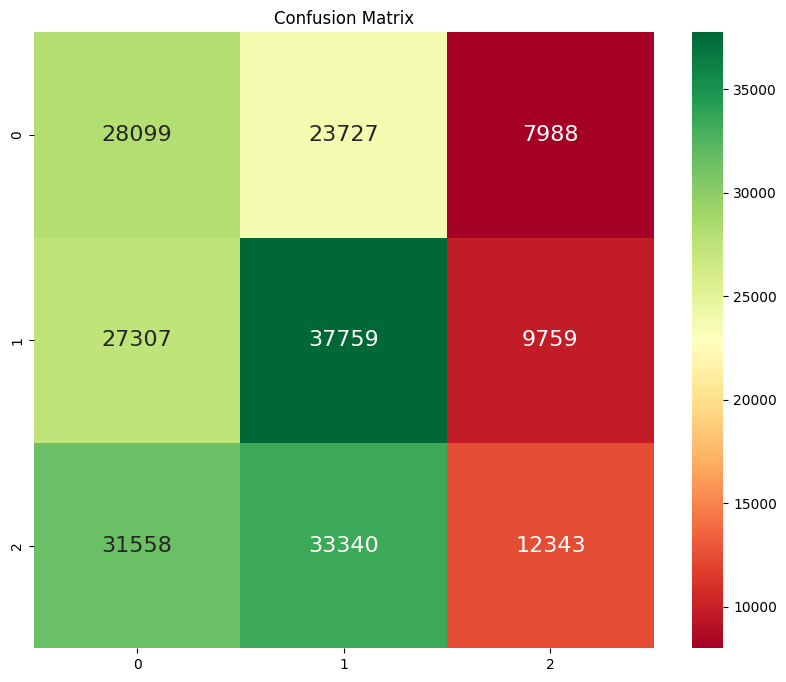

              precision    recall  f1-score   support

           0     0.3231    0.4698    0.3829     59814
           1     0.3982    0.5046    0.4451     74825
           2     0.4102    0.1598    0.2300     77241

    accuracy                         0.3691    211880
   macro avg     0.3772    0.3781    0.3527    211880
weighted avg     0.3814    0.3691    0.3491    211880



In [83]:
plot_results(y_test,y_pred)